In [1]:
import os
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker
import pandas as pd

In [2]:
path = os.getcwd() # donde esta el jupyter 
folder= path + "/dataset/series_mapa/layer04/" # donde estan los .nc
print(folder)

/home/jorge/tsunami-warning/dataset/series_mapa/layer04/


In [3]:
files = []
for file in os.listdir(folder):
    if file.endswith(".nc"):
        files.append(file)
print(files)

['layer04E885.nc', 'layer04E185.nc', 'layer04E390.nc', 'layer04E395.nc', 'layer04E385.nc', 'layer04E485.nc']


In [4]:
files=['layer04E390.nc'] #pueba files original es el de arriba

**comentario:** agrega todos los archivos .nc a lista pata hacer analisis de cada uno.

layer04E390.nc


/home/jorge/anaconda3/envs/machinelearning/lib/python3.7/site-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jorge/anaconda3/envs/machinelearning/lib/python3.7/site-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/jorge/anaconda3/envs/machinelearning/lib/python3.7/site-packages/matplotlib/contour.py:1169: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/home/jorge/anaconda3/envs/machinelearning/lib/python3.7/site-packages/matplotlib/contour.py:1171: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
/home/jorge/anaconda3/envs/machinelearning/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater


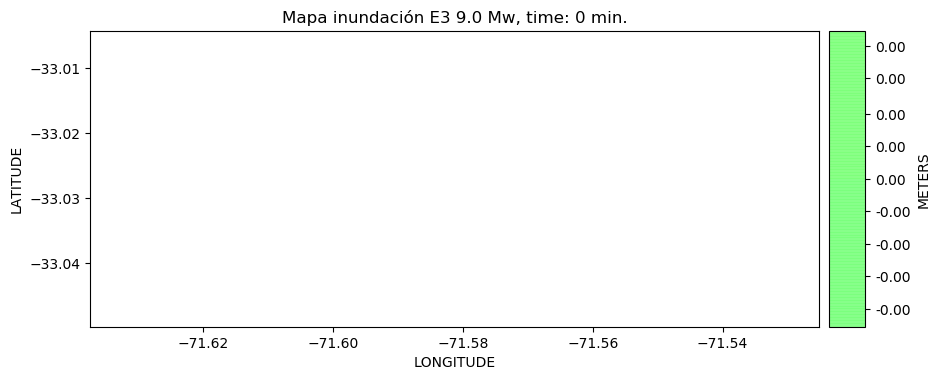

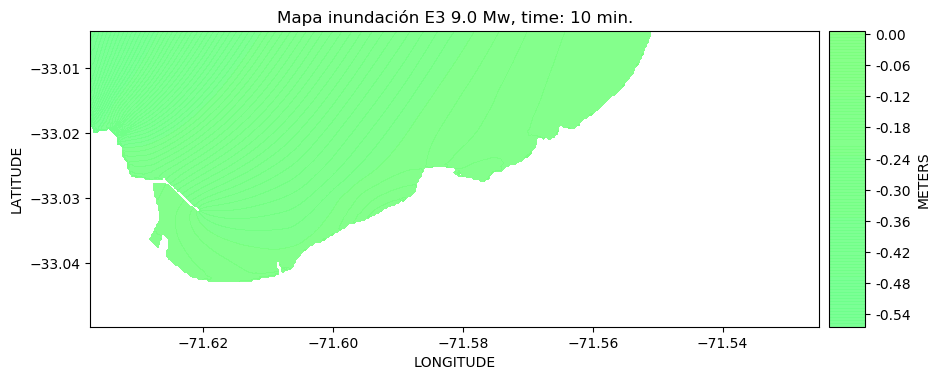

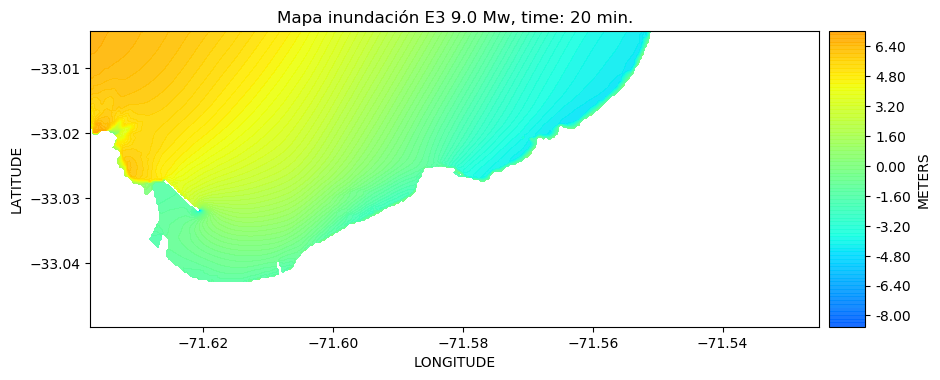

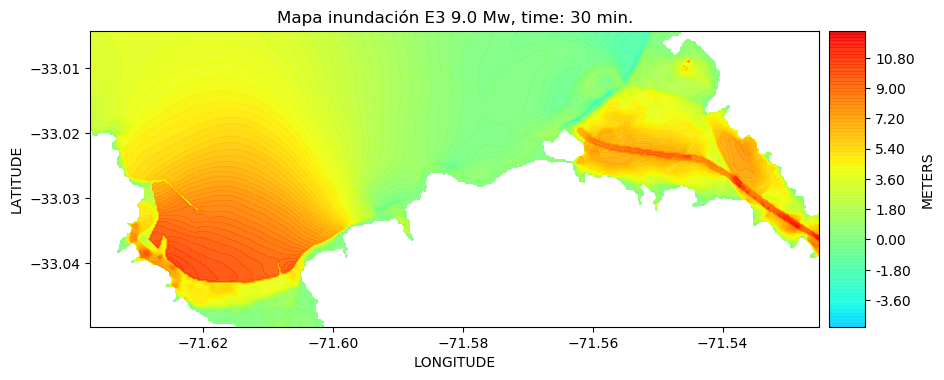

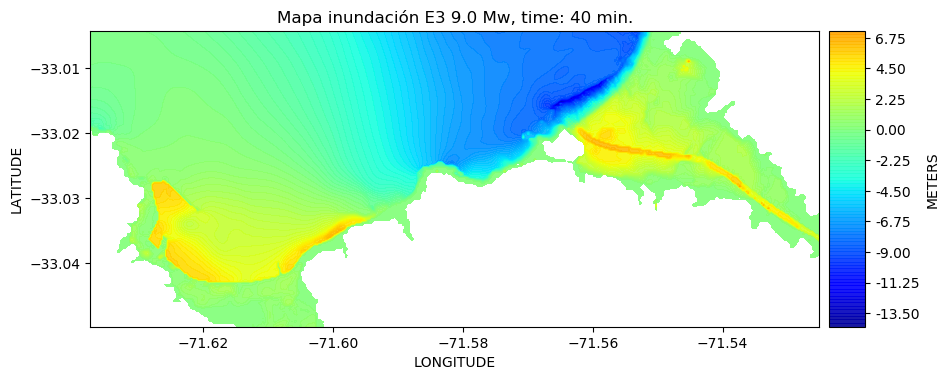

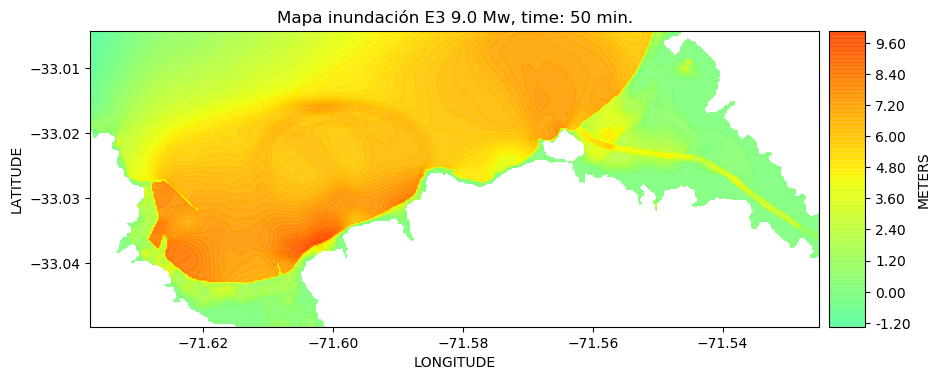

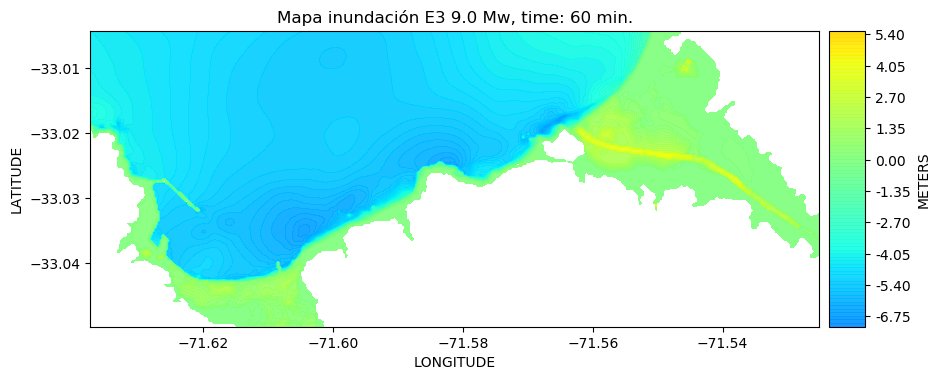

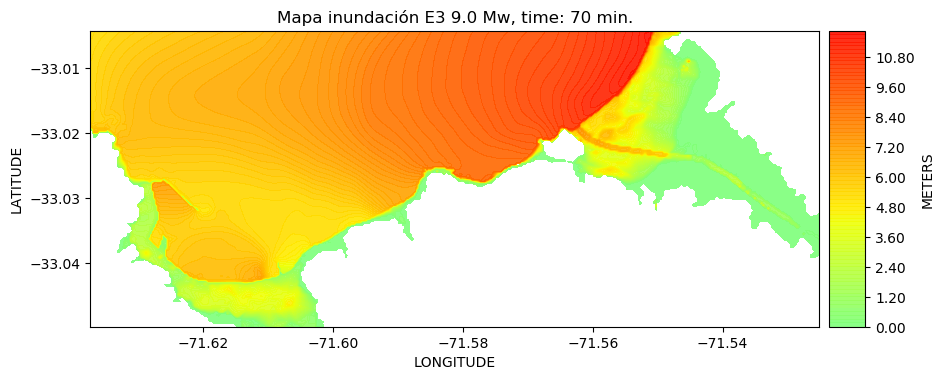

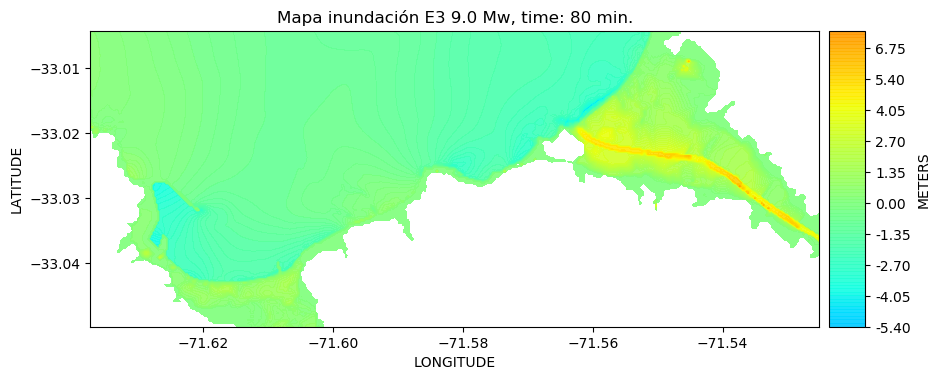

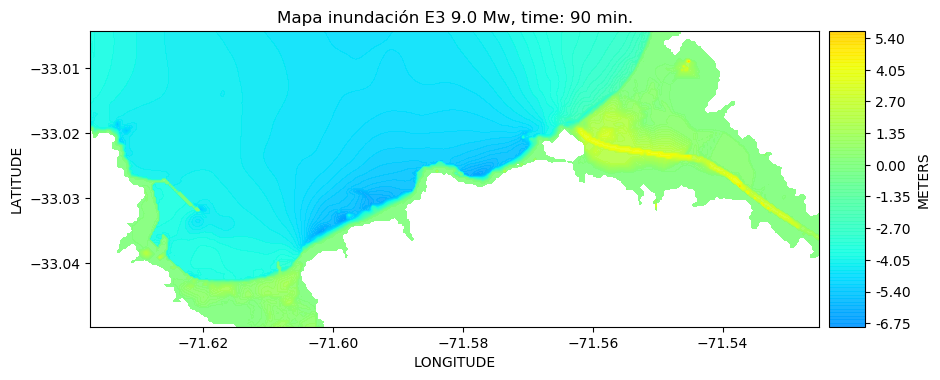

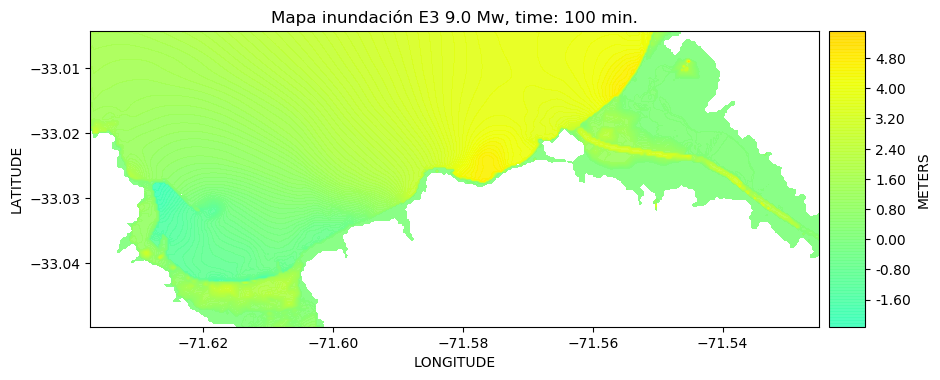

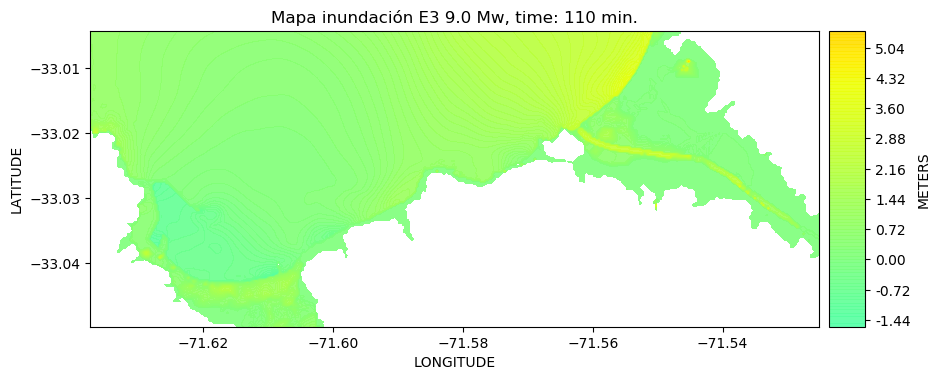

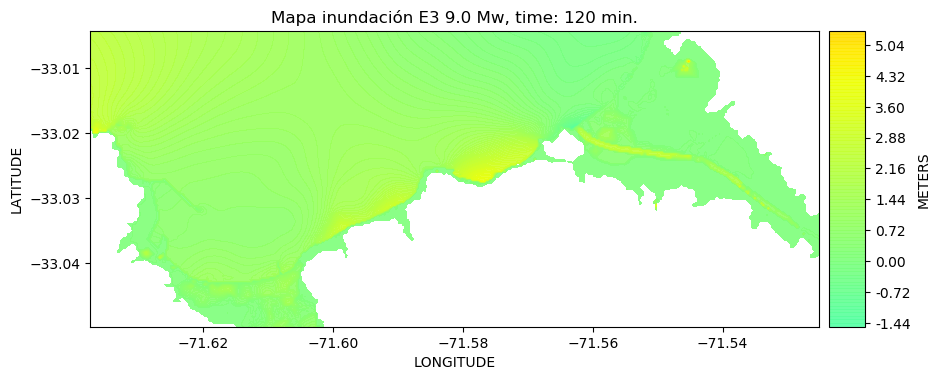

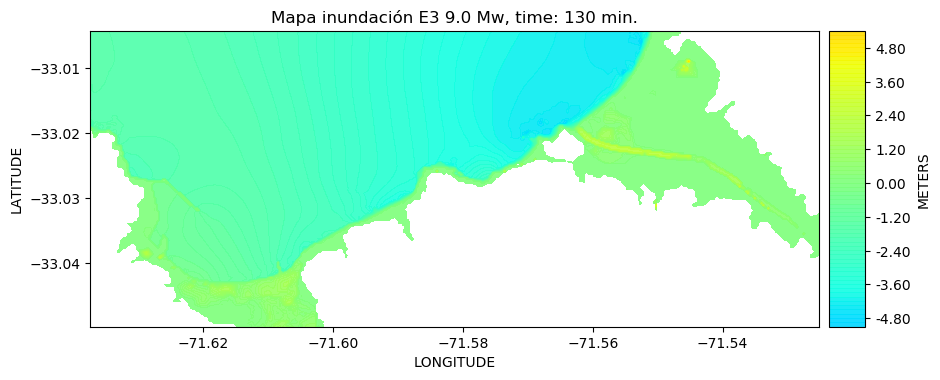

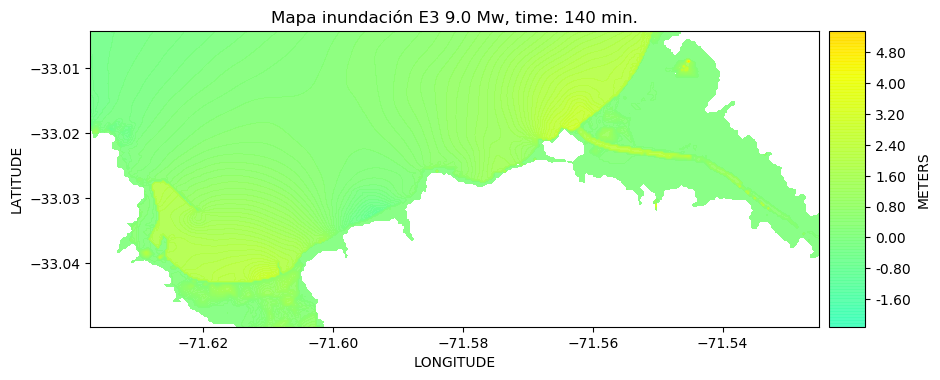

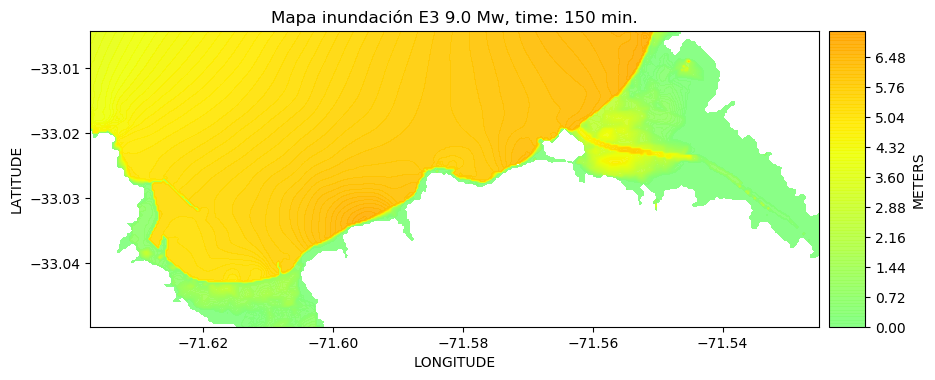

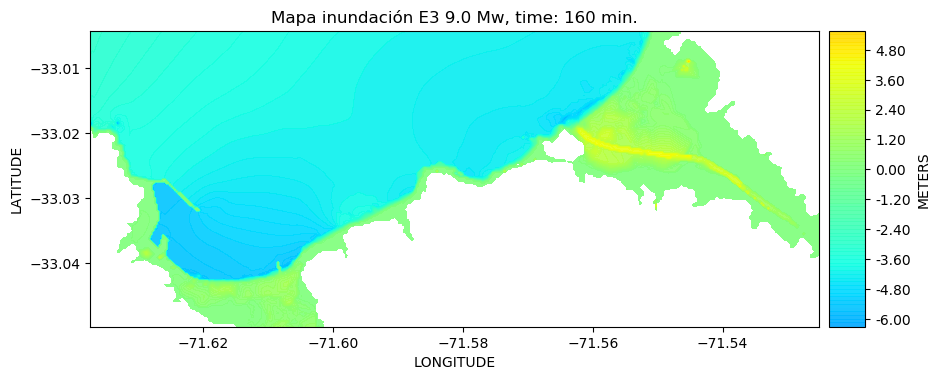

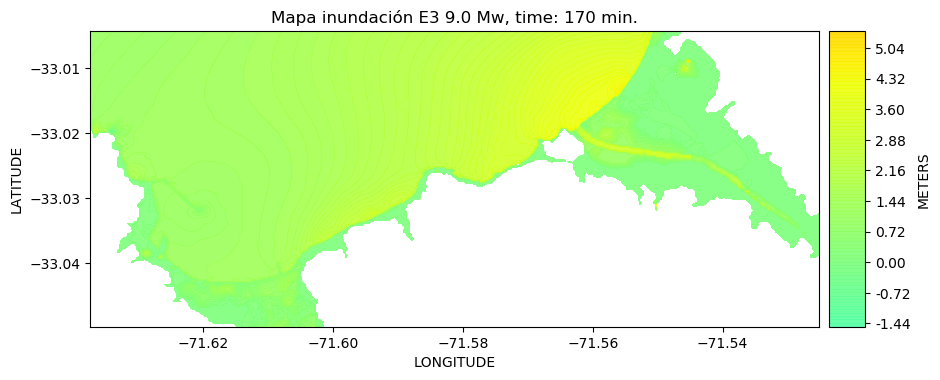

In [5]:
for file in files:
    print(file)
    rutafile = folder  + file
    
    f=Dataset(rutafile,'r') # abrir file
    
    # variables a utilizar
    lon=f.variables['lon'][:]-360 # corregir longitud
    lat=f.variables['lat'][:]
    eta = f.variables['eta'][0]
    nx=eta.shape[1]
    ny=eta.shape[0]
    bat=f.variables['deformed_bathy'][:]
    time = -1
    for e in range(len(f.variables['eta'])):
        time+=1
        #figure = plt.figure(figsize=(10,8), dpi=100)
        fig, ax = plt.subplots(figsize=(10,8),dpi=100)
        eta = f.variables['eta'][e]-f.variables['eta'][0] 
        filtro = eta + f.variables['eta'][0] # lugar que no hay agua
        eta[np.where(eta==0.0)] = np.NaN # altura de agua, falta restarle la topografi
        bat[np.where(bat>0.0)] = np.NaN # topografia

        minz=-5
        maxz=20
        curvas=100
        delta = (maxz-minz)/curvas
        contour=np.linspace(minz,maxz,curvas)

        cs = ax.contourf(lon,lat,eta,curvas,alpha=.9,cmap=cm.get_cmap('jet'),vmin=-15,vmax=15)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.title('Mapa inundación ' + file[-7:-5] +' '+ file[-5]+'.'+file[-4]+' Mw, time: '+ str(time*10)+' min.')
        plt.xlabel('LONGITUDE')
        plt.ylabel('LATITUDE')
        divider = make_axes_locatable(plt.gca())
        cax = divider.append_axes("right", size="5%", pad=0.1)
        cb=fig.colorbar(cs,format='%.2f',cax=cax)
        cb.set_label('METERS')

        if not os.path.exists(rutafile.split('.nc')[0]): # crea folder si no existe
            os.makedirs(rutafile.split('.nc')[0])

        fig.savefig(rutafile.split('.nc')[0]+'/'+file.split('.nc')[0]+'_time'+str(e+10)+'.png',
                       dpi=300,bbox_inches = 'tight',pad_inches = 0)

        #plt.close() no mostrar imagenes si son muchos archivos 
plt.show()